# Forecasting

## Loading Libraries and datasets

In [59]:
# Libraries
import pandas as pd
import numpy as np
import seaborn as sns
#from matplotlib import pyplot as plt

In [60]:
# importing pyplot from matplotlib as plt
# for plotting graphs
#import matplotlib.pyplot as plt
#plt.style.use('default')
#%matplotlib inline

In [61]:
#Data
df = pd.read_csv('../competitive-data-science-final-project/cleaned_train.csv')

In [62]:
df.head()

,date,date_block_num,shop_id,item_id,item_cnt_day,Month,Year,DayofWeek,item_category_id,Holiday
0,2013-01-01,0,2,991,1.0,1,2013,1,67,True
1,2013-01-01,0,2,1472,1.0,1,2013,1,23,True
2,2013-01-01,0,2,1905,1.0,1,2013,1,30,True
3,2013-01-01,0,2,2920,2.0,1,2013,1,21,True
4,2013-01-01,0,2,3320,1.0,1,2013,1,19,True


In [63]:
df.tail()

,date,date_block_num,shop_id,item_id,item_cnt_day,Month,Year,DayofWeek,item_category_id,Holiday
2935816,2015-10-31,33,59,20730,1.0,10,2015,5,72,False
2935817,2015-10-31,33,59,20866,1.0,10,2015,5,72,False
2935818,2015-10-31,33,59,20949,1.0,10,2015,5,71,False
2935819,2015-10-31,33,59,21369,1.0,10,2015,5,40,False
2935820,2015-10-31,33,59,21449,1.0,10,2015,5,40,False


# 1. 3 - day Moving average - Grouped by date

In [64]:
#Reference: https://machinelearningmastery.com/moving-average-smoothing-for-time-series-forecasting-python/

In [65]:
from pandas import read_csv
from numpy import mean
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot

In [66]:
df_daily = df.groupby(df.date)[["item_cnt_day"]].sum()
df_daily.tail()

,item_cnt_day
date,
2015-10-27,1551.0
2015-10-28,3593.0
2015-10-29,1589.0
2015-10-30,2274.0
2015-10-31,3104.0


In [67]:
series = df_daily
series.tail()

,item_cnt_day
date,
2015-10-27,1551.0
2015-10-28,3593.0
2015-10-29,1589.0
2015-10-30,2274.0
2015-10-31,3104.0


In [68]:
# prepare situation
X = series.values
window = 3
history = [X[i] for i in range(window)]
test = [X[i] for i in range(window, len(X))]
predictions = list()

In [69]:
# walk forward over time steps in test
for t in range(len(test)):
 length = len(history)
 yhat = mean([history[i] for i in range(length-window,length)])
 obs = test[t]
 predictions.append(yhat)
 history.append(obs)
 print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

predicted=5857.000000, expected=6617.000000
predicted=7412.333333, expected=6345.000000
predicted=6794.666667, expected=5858.000000
predicted=6273.333333, expected=4984.000000
predicted=5729.000000, expected=4772.000000
predicted=5204.666667, expected=3162.000000
predicted=4306.000000, expected=3142.000000
predicted=3692.000000, expected=3829.000000
predicted=3377.666667, expected=5443.000000
predicted=4138.000000, expected=4475.000000
predicted=4582.333333, expected=2595.000000
predicted=4171.000000, expected=3137.000000
predicted=3402.333333, expected=3033.000000
predicted=2921.666667, expected=3096.000000
predicted=3088.666667, expected=3682.000000
predicted=3270.333333, expected=6044.000000
predicted=4274.000000, expected=5111.000000
predicted=4945.666667, expected=2636.000000
predicted=4597.000000, expected=2775.000000
predicted=3507.333333, expected=2727.000000
predicted=2712.666667, expected=3016.000000
predicted=2839.333333, expected=4244.000000
predicted=3329.000000, expected=

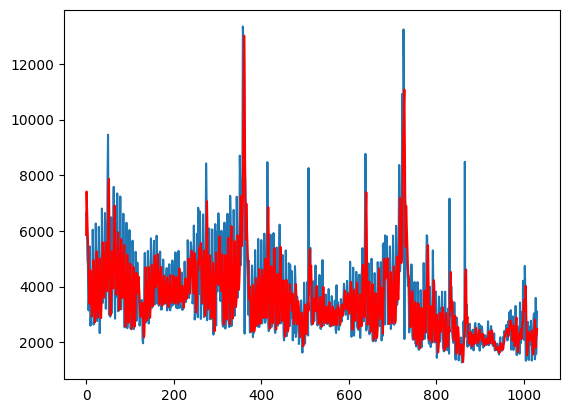

In [70]:
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

In [71]:
np.count_nonzero(predictions[-61:-31])
np.count_nonzero(X[-61:-31])

30

In [72]:
np.count_nonzero(predictions[-31:])
np.count_nonzero(X[-31:])

31

In [73]:
print("Predicted month 32 (Sept): " , np.sum(predictions[-61:-31]))
print("Actual month 32 (Sept): " , np.sum(X[-61:-31]))
print("\nPredicted month 33 (Oct): " , np.sum(predictions[-31:]))
print("Actual month 33 (Oct): " , np.sum(X[-31:]))

Predicted month 32 (Sept):  70302.0
Actual month 32 (Sept):  72843.0

Predicted month 33 (Oct):  73538.66666666666
Actual month 33 (Oct):  71056.0


In [74]:
#Mean Squared Error
print('Test MSE: %.3f' % error)

Test MSE: 1973215.233


# 2. ARMA - Moving average - Grouped by date

In [76]:
#Referenec : https://www.kaggle.com/code/carlmcbrideellis/time-series-a-simple-moving-average-ma-model

In [77]:
df_daily_arma = df_daily.copy()

<AxesSubplot: xlabel='date'>

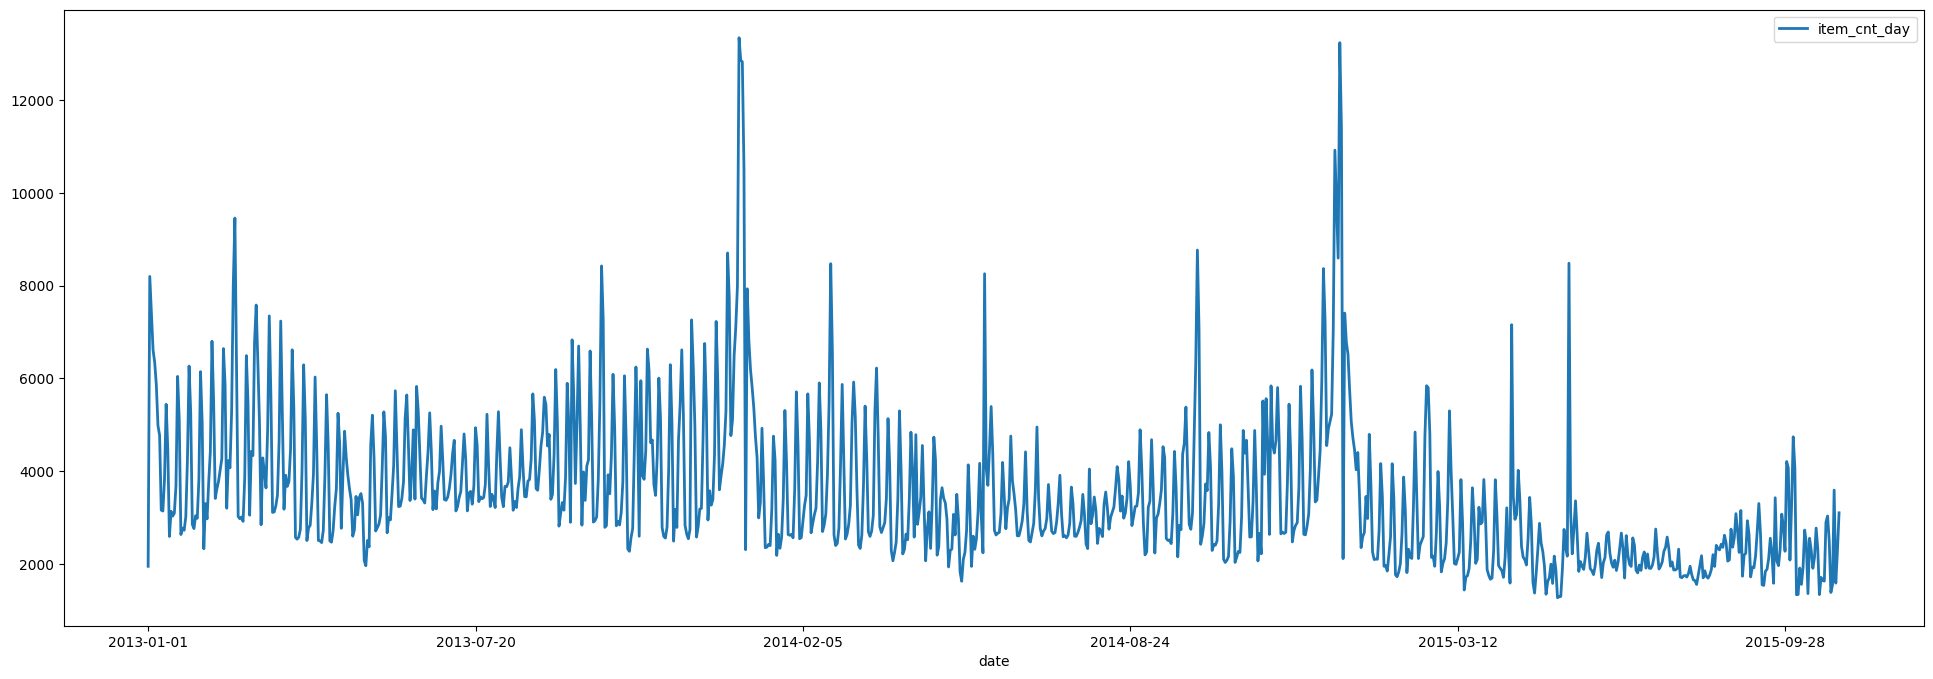

In [78]:
df_daily_arma[['item_cnt_day']].plot(figsize=(24,8), lw=2)

<AxesSubplot: xlabel='date'>

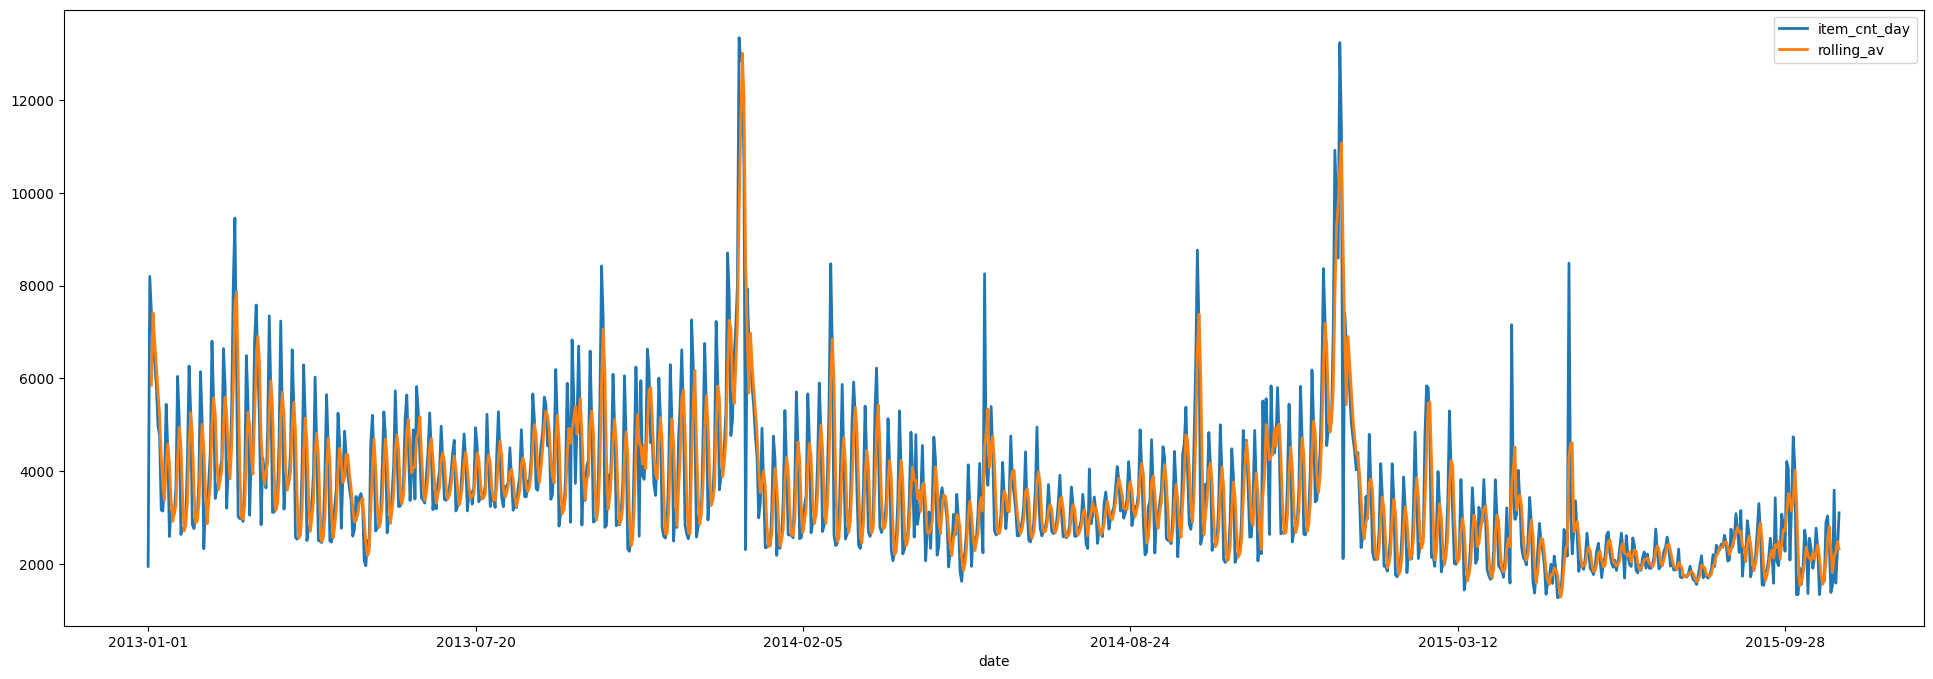

In [79]:
df_daily_arma['rolling_av'] = df_daily_arma['item_cnt_day'].rolling(3).mean()

df_daily_arma[['item_cnt_day','rolling_av']].plot(figsize=(24,8), lw=2)

In [80]:
from statsmodels.tsa.arima.model import ARIMA
ARMA_model = ARIMA(endog=df_daily_arma['item_cnt_day'], order=(0, 0, 10))
results = ARMA_model.fit()
print(results.summary())

/Users/shenya/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/shenya/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/shenya/Library/Python/3.8/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:           item_cnt_day   No. Observations:                 1034
Model:                ARIMA(0, 0, 10)   Log Likelihood               -8635.329
Date:                Thu, 15 Jun 2023   AIC                          17294.658
Time:                        15:03:09   BIC                          17353.952
Sample:                    01-01-2013   HQIC                         17317.157
                         - 10-31-2015                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3528.1568    155.395     22.704      0.000    3223.589    3832.725
ma.L1          0.6938      0.019     36.932      0.000       0.657       0.731
ma.L2          0.2971      0.023     12.673      0.0

In [81]:
df_daily_arma.tail()

,item_cnt_day,rolling_av
date,,
2015-10-27,1551.0,1811.000000
2015-10-28,3593.0,2177.000000
2015-10-29,1589.0,2244.333333
2015-10-30,2274.0,2485.333333
2015-10-31,3104.0,2322.333333


In [82]:
start_date = '2013-01-01'
end_date   = '2015-10-31'
df_daily_arma['forecast'] = results.predict(start=start_date, end=end_date)

In [83]:
df_daily_arma[['item_cnt_day','rolling_av','forecast']].tail(10)

,item_cnt_day,rolling_av,forecast
date,,,
2015-10-22,1632.0,1663.333333,1998.728263
2015-10-23,2901.0,2060.000000,2252.400733
2015-10-24,3035.0,2522.666667,3184.694481
2015-10-25,2495.0,2810.333333,2877.656975
2015-10-26,1387.0,2305.666667,2350.593132
2015-10-27,1551.0,1811.000000,1738.727360
2015-10-28,3593.0,2177.000000,2072.262118
2015-10-29,1589.0,2244.333333,3611.189538
2015-10-30,2274.0,2485.333333,2289.093567


<AxesSubplot: xlabel='date'>

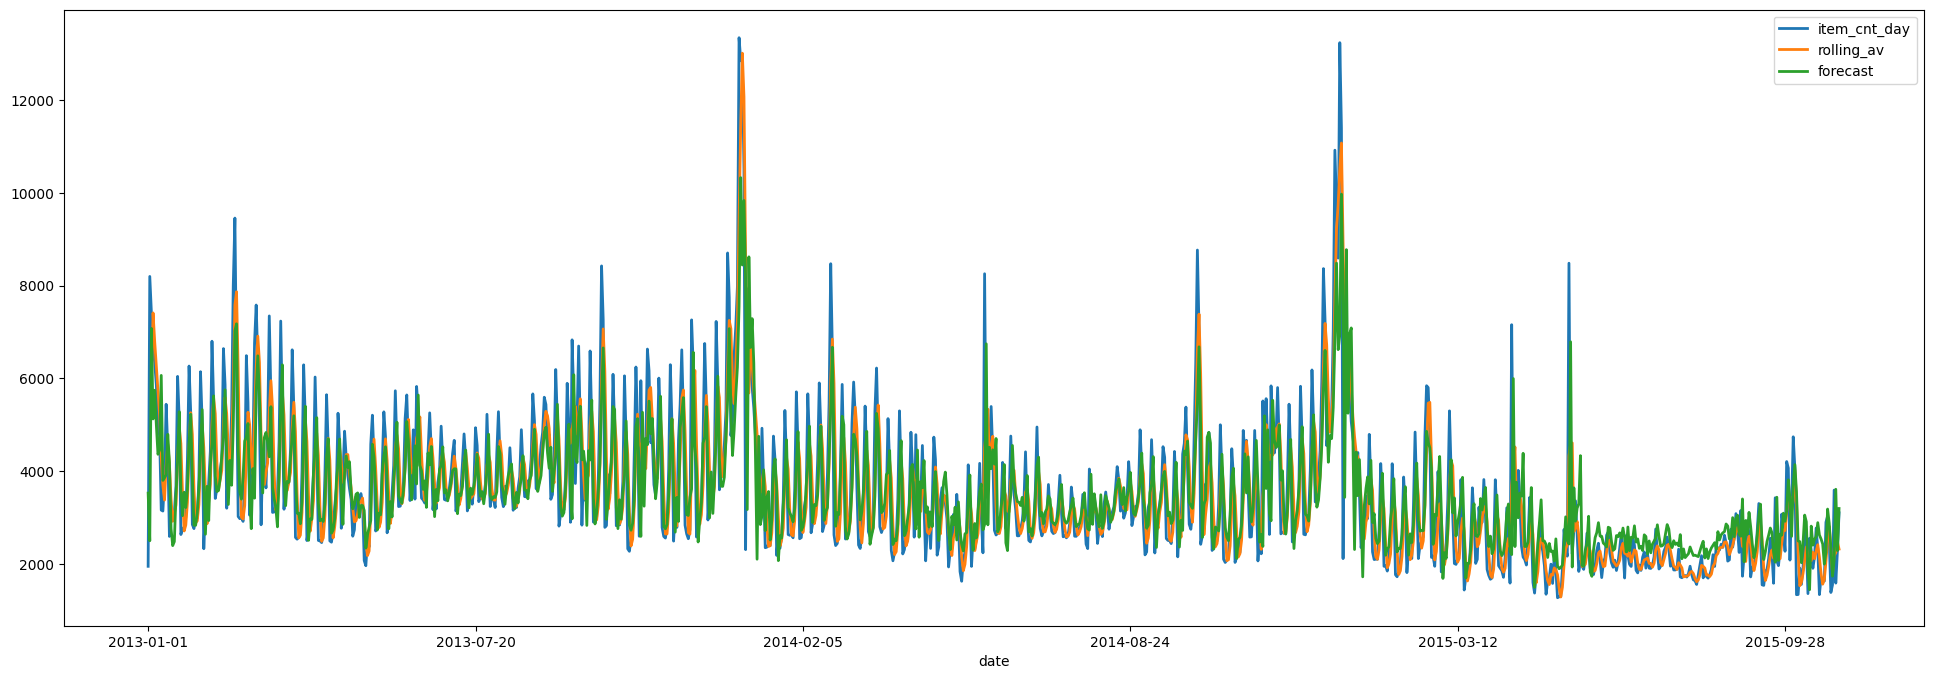

In [84]:
df_daily_arma[['item_cnt_day','rolling_av','forecast']].plot(figsize=(24,8), lw=2)

In [85]:
error = mean_squared_error(df_daily_arma.item_cnt_day, df_daily_arma.forecast)

In [86]:
#Mean Squared Error
print('Test MSE: %.3f' % error)

Test MSE: 1055790.743


In [87]:
df_daily_arma.forecast[-61:-31].count()
df_daily_arma.item_cnt_day[-61:-31].count()

30

In [88]:
df_daily_arma.forecast[-31:].count()
df_daily_arma.item_cnt_day[-31:].count()

31

In [89]:
print("Predicted month 32 (Sept): " , df_daily_arma.forecast[-61:-31].sum())
print("Actual month 32 (Sept): " , df_daily_arma.item_cnt_day[-61:-31].sum())
print("\nPredicted month 33 (Oct): " , df_daily_arma.forecast[-31:].sum())
print("Actual month 33 (Oct): " , df_daily_arma.item_cnt_day[-31:].sum())

Predicted month 32 (Sept):  80725.45082702397
Actual month 32 (Sept):  72843.0

Predicted month 33 (Oct):  82578.06986621793
Actual month 33 (Oct):  71056.0
